# Standard Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import featuretools as ft
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Create train-test datasets

In [3]:
PATH = "../datasets/tradhist.csv"
df = pd.read_csv(PATH)

In [4]:
df.columns

Index(['Unnamed: 0', 'iso_o', 'iso_d', 'year', 'FLOW', 'FLOW_0', 'SOURCE_TF',
       'GDP_o', 'SOURCE_GDP_o', 'GDP_d', 'SOURCE_GDP_d', 'SH_PRIM_o',
       'SOURCE_SH_PRIM_o', 'SH_SECD_o', 'SOURCE_SH_SECD_o', 'SH_PRIM_d',
       'SOURCE_SH_PRIM_d', 'SH_SECD_d', 'SOURCE_SH_SECD_d', 'POP_o', 'POP_d',
       'SOURCE_POP_o', 'SOURCE_POP_d', 'IPTOT_o', 'SOURCE_IPTOT_o', 'IPTOT_d',
       'SOURCE_IPTOT_d', 'XPTOT_o', 'SOURCE_XPTOT_o', 'XPTOT_d',
       'SOURCE_XPTOT_d', 'BITARIFF', 'TARIFF_o', 'SOURCE_TARIFF_o', 'TARIFF_d',
       'SOURCE_TARIFF_d', 'Distw', 'Dist_coord', 'Dist_o', 'Dist_d',
       'SeaDist_SHRT', 'SeaDist_2CST', 'Comlang', 'Contig', 'Curcol', 'Metro',
       'Colo', 'Curcol_o', 'Curcol_d', 'Evercol', 'XCH_RATE_o', 'SOURCE_XCH_o',
       'XCH_RATE_d', 'SOURCE_XCH_d', 'CONTI_o', 'CONTI_d', 'REGIO_o',
       'REGIO_d', 'OECD_o', 'OECD_d', 'EU_o', 'EU_d', 'GATT_o', 'GATT_d'],
      dtype='object')

In [5]:
df

,Unnamed: 0,iso_o,iso_d,year,FLOW,FLOW_0,SOURCE_TF,GDP_o,SOURCE_GDP_o,GDP_d,...,CONTI_o,CONTI_d,REGIO_o,REGIO_d,OECD_o,OECD_d,EU_o,EU_d,GATT_o,GATT_d
0,0,NaN,ADEN,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,ADEN,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,ADEN,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,ADEN,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,ADEN,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,ASIA,NaN,MIDEST,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,2502422,ZWE,ZMB,2010,46558256.0,NaN,DOTS_IP,6.097825e+09,WDI,1.311544e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502423,2502423,ZWE,ZMB,2011,55171376.0,NaN,DOTS_IP,6.838230e+09,WDI,1.464204e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502424,2502424,ZWE,ZMB,2012,58787336.0,NaN,DOTS_IP,7.845171e+09,WDI,1.614464e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0
2502425,2502425,ZWE,ZMB,2013,77869780.0,NaN,DOTS_IP,8.629172e+09,WDI,1.793963e+10,...,AFRI,AFRI,STHAFR,STHAFR,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
features = ["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig", "OECD_o", "OECD_d",
            "GATT_o", "GATT_d", "XPTOT_o", "year", "FLOW", 'IPTOT_d', 'IPTOT_o', 'XPTOT_d']

In [7]:
new_df = df[features]

In [8]:
new_df.shape

(2502427, 17)

In [9]:
new_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,XPTOT_o,year,FLOW,IPTOT_d,IPTOT_o,XPTOT_d
0,NaN,NaN,NaN,4777.089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950,NaN,4.200000e+07,NaN,3.900000e+07
1,NaN,NaN,NaN,4869.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951,NaN,5.000000e+07,NaN,4.500000e+07
2,NaN,NaN,NaN,4963.829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952,NaN,5.700000e+07,NaN,4.600000e+07
3,NaN,NaN,NaN,5061.153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953,NaN,6.100000e+07,NaN,4.100000e+07
4,NaN,NaN,NaN,5162.494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954,NaN,6.700000e+07,NaN,4.500000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,6.097825e+09,1.311544e+10,13973.897,13917.439,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.070475e+09,2010,46558256.0,3.442585e+09,2.673542e+09,4.636377e+09
2502423,6.838230e+09,1.464204e+10,14255.592,14343.526,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.192061e+09,2011,55171376.0,4.543546e+09,3.097955e+09,5.510135e+09
2502424,7.845171e+09,1.614464e+10,14565.482,14786.581,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.457760e+09,2012,58787336.0,5.562818e+09,3.321382e+09,5.922680e+09
2502425,8.629172e+09,1.793963e+10,14898.092,15246.086,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.243481e+09,2013,77869780.0,6.515267e+09,3.244361e+09,6.770876e+09


In [10]:
new_df.isna().sum()

GDP_o      555396
GDP_d      490671
POP_o      322514
POP_d      276342
Distw      199813
Comlang      3003
Contig       3003
OECD_o     712039
OECD_d     712037
GATT_o     363109
GATT_d     363108
XPTOT_o    256551
year            0
FLOW       602737
IPTOT_d    206730
IPTOT_o    269437
XPTOT_d    192973
dtype: int64

In [11]:
cleaned_df = new_df.loc[(new_df["year"] > 2008) & (new_df["FLOW"] > 100)].dropna()

In [12]:
cleaned_df.shape

(129408, 17)

In [13]:
cleaned_df

,GDP_o,GDP_d,POP_o,POP_d,Distw,Comlang,Contig,OECD_o,OECD_d,GATT_o,GATT_d,XPTOT_o,year,FLOW,IPTOT_d,IPTOT_o,XPTOT_d
1707,1.613070e+09,1.119100e+10,101.936,28809.168,13168.223762,0.0,0.0,0.0,0.0,0.0,0.0,2.671829e+09,2011,60232.73,6.612774e+09,3.692892e+09,3.224723e+08
1839,1.604113e+09,1.627569e+11,101.416,7705.423,12773.079714,0.0,0.0,0.0,0.0,0.0,1.0,1.363620e+09,2009,11195.58,9.999943e+10,1.571841e+09,1.232484e+11
1841,1.613070e+09,2.175294e+11,101.936,8734.722,12773.079714,0.0,0.0,0.0,0.0,0.0,1.0,2.671829e+09,2011,113576.80,1.365564e+11,3.692892e+09,1.884906e+11
1874,1.604113e+09,2.417646e+11,101.416,40798.640,5187.787570,0.0,0.0,0.0,0.0,0.0,1.0,1.363620e+09,2009,894681.06,2.489420e+10,1.571841e+09,3.806315e+10
1875,1.597046e+09,2.987639e+11,101.597,41222.875,5187.787570,0.0,0.0,0.0,0.0,0.0,1.0,1.848131e+08,2010,166.97,3.636240e+10,9.023266e+08,4.582931e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502422,6.097825e+09,1.311544e+10,13973.897,13917.439,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.070475e+09,2010,46558256.00,3.442585e+09,2.673542e+09,4.636377e+09
2502423,6.838230e+09,1.464204e+10,14255.592,14343.526,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.192061e+09,2011,55171376.00,4.543546e+09,3.097955e+09,5.510135e+09
2502424,7.845171e+09,1.614464e+10,14565.482,14786.581,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.457760e+09,2012,58787336.00,5.562818e+09,3.321382e+09,5.922680e+09
2502425,8.629172e+09,1.793963e+10,14898.092,15246.086,583.795386,1.0,1.0,0.0,0.0,1.0,1.0,2.243481e+09,2013,77869780.00,6.515267e+09,3.244361e+09,6.770876e+09


In [14]:
cleaned_df = cleaned_df.drop(["year"], axis=1)

In [15]:
X = cleaned_df[["GDP_o", "GDP_d", "POP_o", "POP_d", "Distw", "Comlang", "Contig", "OECD_o", "OECD_d",
                "GATT_o", "GATT_d", "XPTOT_o", "FLOW", 'IPTOT_d', 'IPTOT_o', 'XPTOT_d']]

y = cleaned_df[["FLOW"]]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
X_train.shape

(97056, 16)

In [36]:
X.shape

(129408, 16)

In [19]:
feature_importances = np.zeros(cleaned_df.shape[1])

In [37]:
#model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss',
                           #n_estimators = 10000, class_weight = 'balanced')

#model = lgb.LGBMRegressor(n_estimators=30000, class_weight='balanced')
model = lgb.LGBMRegressor()

In [38]:
train_features, valid_features, train_y, valid_y = train_test_split(X_train, y_train,
                                                                    test_size = 0.25, random_state = 42)

In [44]:

model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)],
          eval_metric = 'rmse', verbose = 200)

LGBMRegressor()

In [43]:
model.score(X_test, y_test)

0.9173071855441898

In [21]:
for i in range(2):

    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X, y, test_size = 0.25, random_state = i)

    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)],
              eval_metric = 'rmse', verbose = 200)

    # Record the feature importances
    feature_importances += model.feature_importances_

In [22]:
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
12,FLOW,491.5
4,Distw,413.5
1,GDP_d,359.5
2,POP_o,306.5
11,XPTOT_o,286.5


In [23]:
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 1 features with 0.0 importance


,feature,importance
7,OECD_o,24.5
5,Comlang,20.0
8,OECD_d,9.5
9,GATT_o,0.5
10,GATT_d,0.0


In [24]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.

    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances

    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column

    """

    plt.rcParams['font.size'] = 18

    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()

    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance');
    plt.title('Cumulative Feature Importance');
    plt.show();

    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

    return df

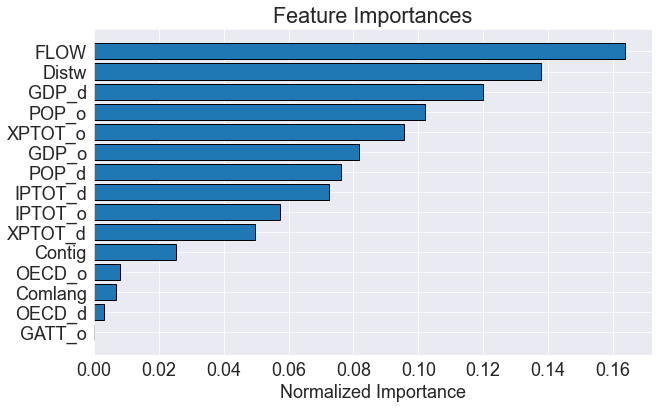

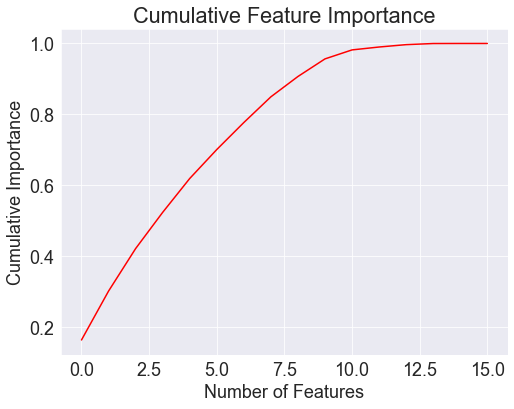

9 features required for 0.90 of cumulative importance


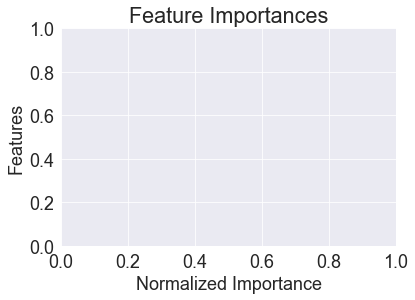

In [45]:
norm_feature_importances = plot_feature_importances(feature_importances)
plt.xlabel("Normalized Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

In [27]:
model.score(X_test, y_test)

0.9672289423137956